In [364]:
import numpy as np   
from sklearn.linear_model import LinearRegression
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix

In [365]:
df = pd.read_excel('Tourism.xlsx',sheet_name='Tourism')
df_temp2=df.copy()
df_temp3=df.copy()
df.info()
df.head(20)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0
6,200006,0,59.0,Self Enquiry,1,9.0,Small Business,Female,2,2.0,Basic,5.0,Divorced,5.0,1,2,1,1.0,Executive,17670.0
7,200007,0,30.0,Self Enquiry,1,30.0,Salaried,Male,3,3.0,Basic,3.0,Married,2.0,0,2,0,1.0,Executive,17693.0
8,200008,0,38.0,Company Invited,1,29.0,Salaried,Male,2,4.0,Standard,3.0,Unmarried,1.0,0,3,0,0.0,Senior Manager,24526.0
9,200009,0,36.0,Self Enquiry,1,33.0,Small Business,Male,3,3.0,Deluxe,3.0,Divorced,7.0,0,3,1,0.0,Manager,20237.0


In [61]:
df.info()
##There are some missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [161]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


In [255]:


# number of missing values (only the ones recognised as missing values) in each of the attributes

percent_missing = df.isnull().sum() * 100 / len(df)
print(' \nDurationOfPitch, Age,NumberOfTrip,MonthlyIncome has more missing value in ters of percent\n\n')
print(pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing}))




 
DurationOfPitch, Age,NumberOfTrip,MonthlyIncome has more missing value in ters of percent


                                       column_name  percent_missing
CustomerID                              CustomerID         0.000000
ProdTaken                                ProdTaken         0.000000
Age                                            Age         4.623568
TypeofContact                        TypeofContact         0.511457
CityTier                                  CityTier         0.000000
DurationOfPitch                    DurationOfPitch         5.135025
Occupation                              Occupation         0.000000
Gender                                      Gender         0.000000
NumberOfPersonVisiting      NumberOfPersonVisiting         0.000000
NumberOfFollowups                NumberOfFollowups         0.920622
ProductPitched                      ProductPitched         0.000000
PreferredPropertyStar        PreferredPropertyStar         0.531915
MaritalStatus         

C:\Users\91866\AppData\Local\Temp\ipykernel_1092\416000446.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean())


In [249]:
#Check the number of unique values in each column
print(df.nunique())



CustomerID                  4888
ProdTaken                      2
Age                           45
TypeofContact                  2
CityTier                       3
DurationOfPitch               35
Occupation                     4
Gender                         3
NumberOfPersonVisiting         5
NumberOfFollowups              7
ProductPitched                 5
PreferredPropertyStar          4
MaritalStatus                  4
NumberOfTrips                 13
Passport                       2
PitchSatisfactionScore         5
OwnCar                         2
NumberOfChildrenVisiting       5
Designation                    5
MonthlyIncome               2476
dtype: int64


In [250]:

#Print the average of monthly income for each Designation
dfdumuy=df.groupby(["Designation"])[["MonthlyIncome"]].sum().reset_index()
dfdumuy.head(25)

,Designation,MonthlyIncome
0,AVP,1.102644e+07
1,Executive,3.704949e+07
2,Manager,3.936055e+07
3,Senior Manager,1.976521e+07
4,VP,8.252158e+06


In [375]:
##Drop the ‘CustomerID’
df.drop(['CustomerID'], axis=1,inplace=True)
df

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1.0,41.000000,1.0,3.0,6.0,1.0,2.0,3.0,3.0,2.0,3.0,3.0,1.0,1.0,2.0,1.0,0.0,2.0,20993.0
1,0.0,49.000000,2.0,1.0,14.0,1.0,1.0,3.0,4.0,2.0,4.0,2.0,2.0,0.0,3.0,1.0,2.0,2.0,20130.0
2,1.0,37.000000,1.0,1.0,8.0,5.0,1.0,3.0,4.0,1.0,3.0,3.0,7.0,1.0,3.0,0.0,0.0,1.0,17090.0
3,0.0,33.000000,2.0,1.0,9.0,1.0,2.0,2.0,3.0,1.0,3.0,2.0,2.0,1.0,5.0,1.0,1.0,1.0,17909.0
4,0.0,37.622265,1.0,1.0,8.0,3.0,1.0,2.0,3.0,1.0,4.0,2.0,1.0,0.0,5.0,1.0,0.0,1.0,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1.0,49.000000,1.0,3.0,9.0,3.0,1.0,3.0,5.0,2.0,4.0,4.0,2.0,1.0,1.0,1.0,1.0,2.0,26576.0
4884,1.0,28.000000,2.0,1.0,31.0,1.0,1.0,4.0,5.0,1.0,3.0,3.0,3.0,1.0,3.0,1.0,2.0,1.0,21212.0
4885,1.0,52.000000,1.0,3.0,17.0,1.0,2.0,4.0,4.0,3.0,4.0,1.0,7.0,0.0,1.0,1.0,3.0,3.0,31820.0
4886,1.0,19.000000,1.0,3.0,16.0,3.0,1.0,3.0,4.0,1.0,3.0,3.0,3.0,0.0,5.0,0.0,2.0,1.0,20289.0


In [167]:
#Print a 5-point summary of the dataframe and share your observation
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,4888.0,0.188216,0.390925,0.0,0.0,0.0,0.00,1.0
Age,4888.0,37.622265,9.098418,18.0,31.0,37.0,43.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.0,1.0,3.00,3.0
DurationOfPitch,4888.0,15.490835,8.297971,5.0,9.0,14.0,19.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.0,3.0,3.00,5.0
NumberOfFollowups,4888.0,3.708445,0.997882,1.0,3.0,4.0,4.00,6.0
PreferredPropertyStar,4888.0,3.581037,0.795883,3.0,3.0,3.0,4.00,5.0
NumberOfTrips,4888.0,3.236521,1.822342,1.0,2.0,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.0,0.0,1.00,1.0
PitchSatisfactionScore,4888.0,3.078151,1.365792,1.0,2.0,3.0,4.00,5.0


In [8]:
df.dtypes

ProdTaken                     int64
Age                         float64
TypeofContact                object
CityTier                      int64
DurationOfPitch             float64
Occupation                   object
Gender                       object
NumberOfPersonVisiting        int64
NumberOfFollowups           float64
ProductPitched               object
PreferredPropertyStar       float64
MaritalStatus                object
NumberOfTrips               float64
Passport                      int64
PitchSatisfactionScore        int64
OwnCar                        int64
NumberOfChildrenVisiting    float64
Designation                  object
MonthlyIncome               float64
dtype: object

In [376]:
#J. Convert the data type of each categorical variable to 'category

for feature in df.columns: # Loop through all columns in the dataframe
    if df[feature].dtype == 'object': # Only apply for columns with categorical strings
        df[feature] = pd.Categorical(df[feature])# Replace strings with an integer
df.head(10)



,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1.0,41.000000,1.0,3.0,6.0,1.0,2.0,3.0,3.0,2.0,3.0,3.0,1.0,1.0,2.0,1.0,0.0,2.0,20993.0
1,0.0,49.000000,2.0,1.0,14.0,1.0,1.0,3.0,4.0,2.0,4.0,2.0,2.0,0.0,3.0,1.0,2.0,2.0,20130.0
2,1.0,37.000000,1.0,1.0,8.0,5.0,1.0,3.0,4.0,1.0,3.0,3.0,7.0,1.0,3.0,0.0,0.0,1.0,17090.0
3,0.0,33.000000,2.0,1.0,9.0,1.0,2.0,2.0,3.0,1.0,3.0,2.0,2.0,1.0,5.0,1.0,1.0,1.0,17909.0
4,0.0,37.622265,1.0,1.0,8.0,3.0,1.0,2.0,3.0,1.0,4.0,2.0,1.0,0.0,5.0,1.0,0.0,1.0,18468.0
5,0.0,32.000000,2.0,1.0,8.0,1.0,1.0,3.0,3.0,1.0,3.0,3.0,1.0,0.0,5.0,1.0,1.0,1.0,18068.0
6,0.0,59.000000,1.0,1.0,9.0,3.0,2.0,2.0,2.0,1.0,5.0,2.0,5.0,1.0,2.0,1.0,1.0,1.0,17670.0
7,0.0,30.000000,1.0,1.0,30.0,1.0,1.0,3.0,3.0,1.0,3.0,1.0,2.0,0.0,2.0,0.0,1.0,1.0,17693.0
8,0.0,38.000000,2.0,1.0,29.0,1.0,1.0,2.0,4.0,3.0,3.0,4.0,1.0,0.0,3.0,0.0,0.0,3.0,24526.0
9,0.0,36.000000,1.0,1.0,33.0,3.0,1.0,3.0,3.0,2.0,3.0,2.0,7.0,0.0,3.0,1.0,0.0,2.0,20237.0


In [367]:
# replace the missing values with median value
df = df.fillna(df.mean())

C:\Users\91866\AppData\Local\Temp\ipykernel_1092\416000446.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean())


In [368]:
#Print the count of each unique category in each of the categorical variables


print(df.TypeofContact.value_counts())
print(df.Occupation.value_counts())
print(df.Gender.value_counts())

print(df.ProductPitched.value_counts())
print(df.MaritalStatus.value_counts())
print(df.Designation.value_counts())

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64


In [369]:
#Observe the unexpected values/categories in the categorical variables carefully and impute them with the best approach
df.isna().sum
percent_missing = df.isnull().sum() * 100 / len(df)
print(' \nDurationOfPitch, Age,NumberOfTrip,MonthlyIncome has more missing value in ters of percent\n\n')
print(pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing}))


 
DurationOfPitch, Age,NumberOfTrip,MonthlyIncome has more missing value in ters of percent


                                       column_name  percent_missing
CustomerID                              CustomerID         0.000000
ProdTaken                                ProdTaken         0.000000
Age                                            Age         0.000000
TypeofContact                        TypeofContact         0.511457
CityTier                                  CityTier         0.000000
DurationOfPitch                    DurationOfPitch         0.000000
Occupation                              Occupation         0.000000
Gender                                      Gender         0.000000
NumberOfPersonVisiting      NumberOfPersonVisiting         0.000000
NumberOfFollowups                NumberOfFollowups         0.000000
ProductPitched                      ProductPitched         0.000000
PreferredPropertyStar        PreferredPropertyStar         0.000000
MaritalStatus         

In [370]:
print(df["TypeofContact"].isna().sum())

##these null values shall be removed in future steps..

25


In [260]:
#A. Create a copy of the prepared data to perform EDA

df_temp2=df.copy()

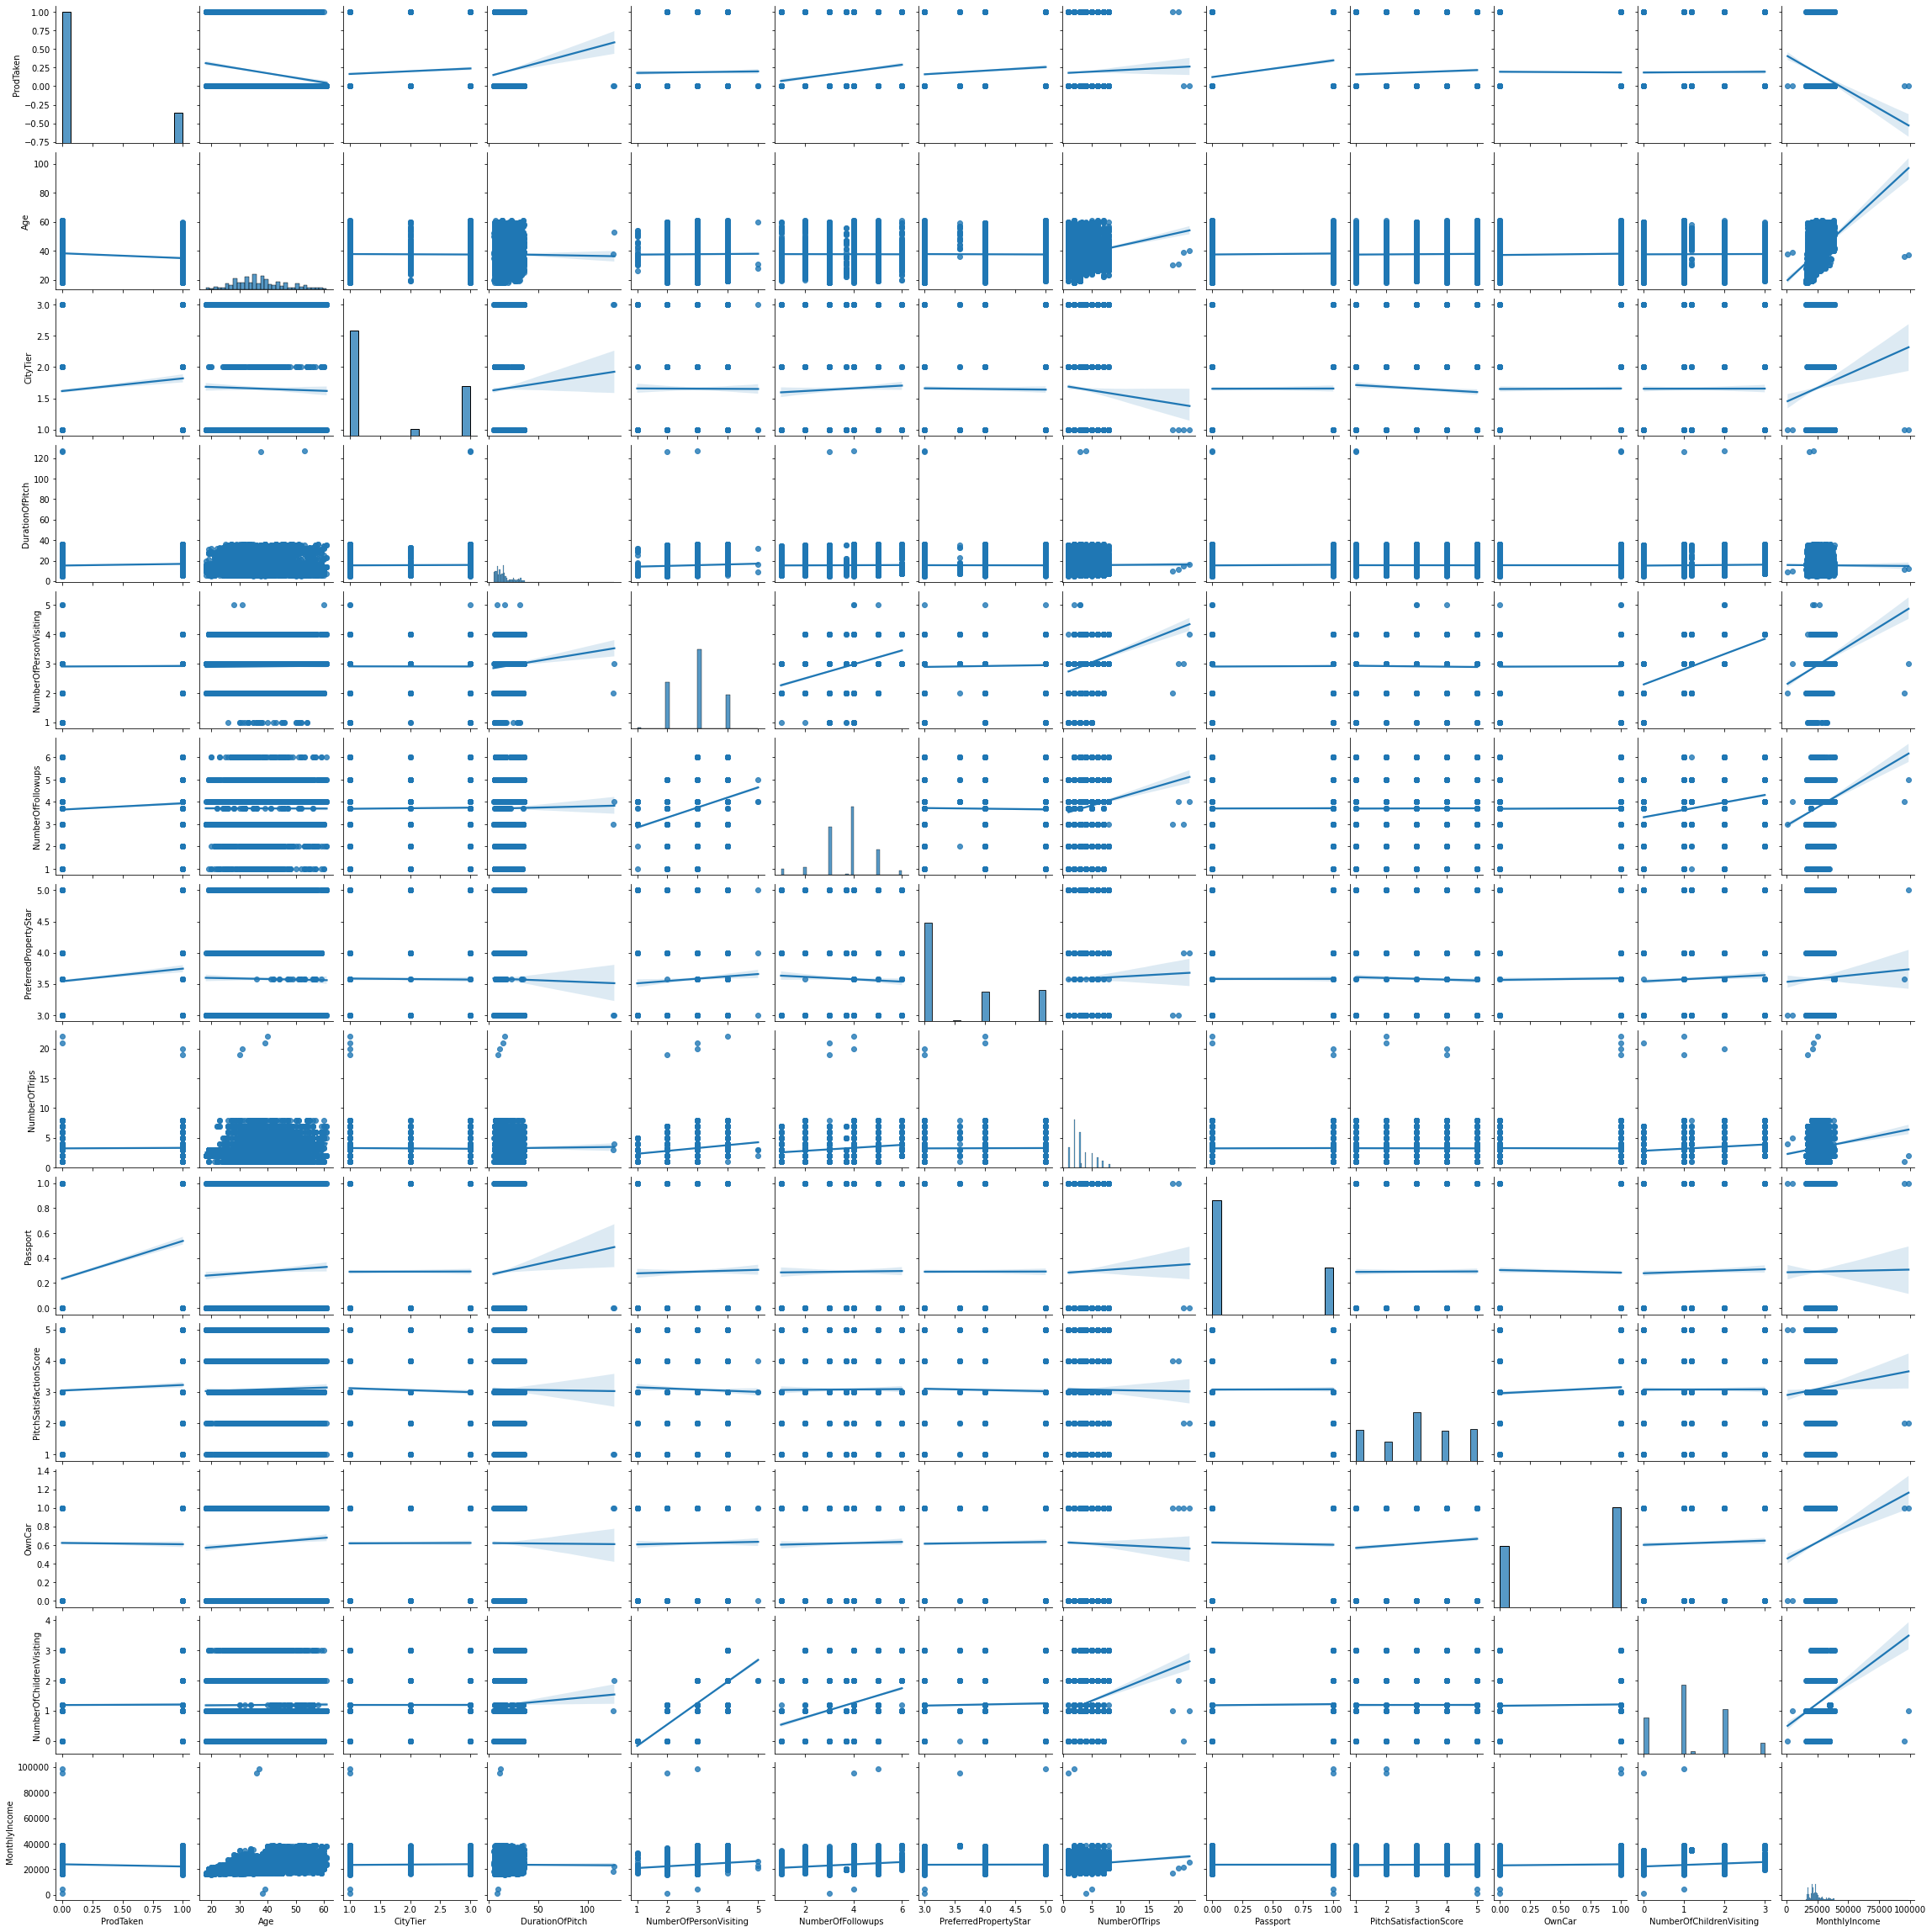

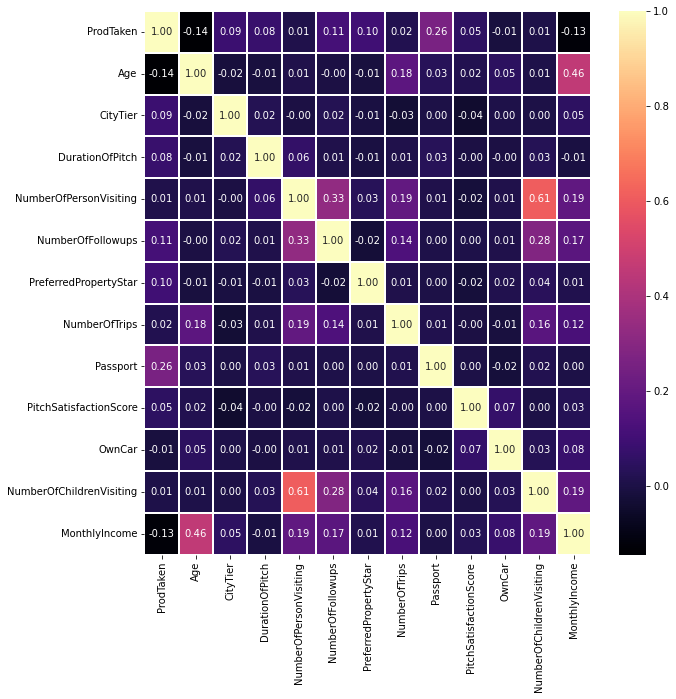

In [188]:
#B. Perform Univariate Analysis on numerical and Categorical data.

import seaborn as sns

sns.pairplot(df_temp2, kind="reg")  # plots scatter plots for every pair of attributes and histograms along the diagonal
plt.show()


fig,ax = plt.subplots(figsize=(10, 10))   
sns.heatmap(df_temp2.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma") # the color intensity is based on 
plt.show()


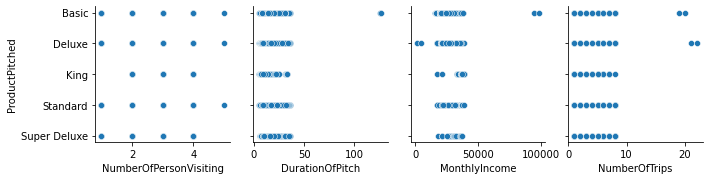

In [14]:
sns.pairplot(df_temp2, y_vars='ProductPitched', x_vars=['NumberOfPersonVisiting','DurationOfPitch','MonthlyIncome','NumberOfTrips'])


THERE IS SIGNIFICANT DIRECT CORREALTION BETWEEN no. of chidren visiting and no. of people visiting AND between Age and Monthly Income AND INDIRECT RELATION BETWEEN Age and Prodction Taken 



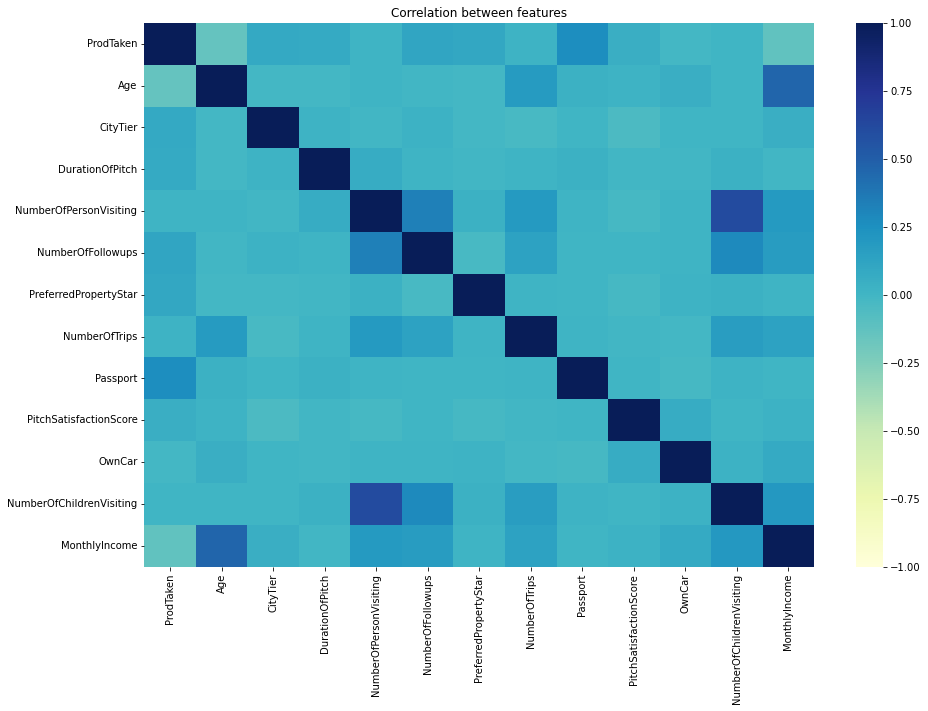

In [18]:
corr = df.corr() 
plt.figure(figsize=(15, 10))

# plotting the heat map
# corr: give the correlation matrix
# cmap: colour code used for plotting
# vmax: gives maximum range of values for the chart
# vmin: gives minimum range of values for the chart

sns.heatmap(corr, cmap='YlGnBu', vmax=1.0, vmin=-1.0)

# specify name of the plot
plt.title('Correlation between features')
print("\nTHERE IS SIGNIFICANT DIRECT CORREALTION BETWEEN no. of chidren visiting and no. of people visiting AND between Age and Monthly Income AND INDIRECT RELATION BETWEEN Age and Prodction Taken \n")
plt.show()   # displays the correlation between every possible pair of attributes as a dataframe

In [377]:
##. REPLACING CATEGORICAL WITH  NUMERICAL VALUES


replaceStruct = {
                "TypeofContact":     {"Self Enquiry": 1, "Company Invited": 2},
                "Occupation": {"Salaried": 1, "poor":2 , "Small Business": 3, "Large Business": 4,"Free Lancer": 5},
                 "Gender": {"Male": 1, "Female":2 , "Fe Male": 3},
                 "ProductPitched":     {"Basic": 1, "Deluxe": 2,"Standard": 3, "Super Deluxe": 4 ,"King": 5},
                "MaritalStatus":     {"Married": 1, "Divorced": 2, "Single":3 ,"Unmarried" : 4},
                "Designation":     {"Executive": 1, "Manager": 2, "Senior Manager": 3, "AVP": 4 , "VP" :5 },
                    }




df=df.replace(replaceStruct)
df.head(10)

df= df.astype({'ProdTaken':'float','TypeofContact':'float','CityTier':'float','Occupation':'float','Gender':'float','NumberOfPersonVisiting':'float','ProductPitched':'float','MaritalStatus':'float','Designation':'float','Passport':'float','PitchSatisfactionScore':'float','OwnCar':'float'})


In [262]:
df.shape


(4888, 19)

In [372]:
from scipy import stats
import numpy as np
threshold=3
z = np.abs(stats.zscore(df))   # get the z-score of every value with respect to their columns
df2 =df[(z < 3).all(axis=1)]    # Select only the rows without a single outlier
df2.shape,df.shape



##looks like there s no outliers from zscore


((0, 20), (4888, 20))

In [378]:
df

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1.0,41.000000,1.0,3.0,6.0,1.0,2.0,3.0,3.0,2.0,3.0,3.0,1.0,1.0,2.0,1.0,0.0,2.0,20993.0
1,0.0,49.000000,2.0,1.0,14.0,1.0,1.0,3.0,4.0,2.0,4.0,2.0,2.0,0.0,3.0,1.0,2.0,2.0,20130.0
2,1.0,37.000000,1.0,1.0,8.0,5.0,1.0,3.0,4.0,1.0,3.0,3.0,7.0,1.0,3.0,0.0,0.0,1.0,17090.0
3,0.0,33.000000,2.0,1.0,9.0,1.0,2.0,2.0,3.0,1.0,3.0,2.0,2.0,1.0,5.0,1.0,1.0,1.0,17909.0
4,0.0,37.622265,1.0,1.0,8.0,3.0,1.0,2.0,3.0,1.0,4.0,2.0,1.0,0.0,5.0,1.0,0.0,1.0,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1.0,49.000000,1.0,3.0,9.0,3.0,1.0,3.0,5.0,2.0,4.0,4.0,2.0,1.0,1.0,1.0,1.0,2.0,26576.0
4884,1.0,28.000000,2.0,1.0,31.0,1.0,1.0,4.0,5.0,1.0,3.0,3.0,3.0,1.0,3.0,1.0,2.0,1.0,21212.0
4885,1.0,52.000000,1.0,3.0,17.0,1.0,2.0,4.0,4.0,3.0,4.0,1.0,7.0,0.0,1.0,1.0,3.0,3.0,31820.0
4886,1.0,19.000000,1.0,3.0,16.0,3.0,1.0,3.0,4.0,1.0,3.0,3.0,3.0,0.0,5.0,0.0,2.0,1.0,20289.0


In [379]:
df = df.dropna(axis=0, subset=['TypeofContact'])


##remove the Type of contact null values from data

In [380]:
df.isna().sum()



ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64


 After struturing  data THERE IS SIGNIFICANT DIRECT CORREALTION BETWEEN Prodct pitched and Designation and monthly income , and between age and monthly incomen,and no. of people visiting AND between Age with Designation , monthly income and product pitched , and between No. of people visiting with no. of children visiting and no. of persons visiting with foloow ups



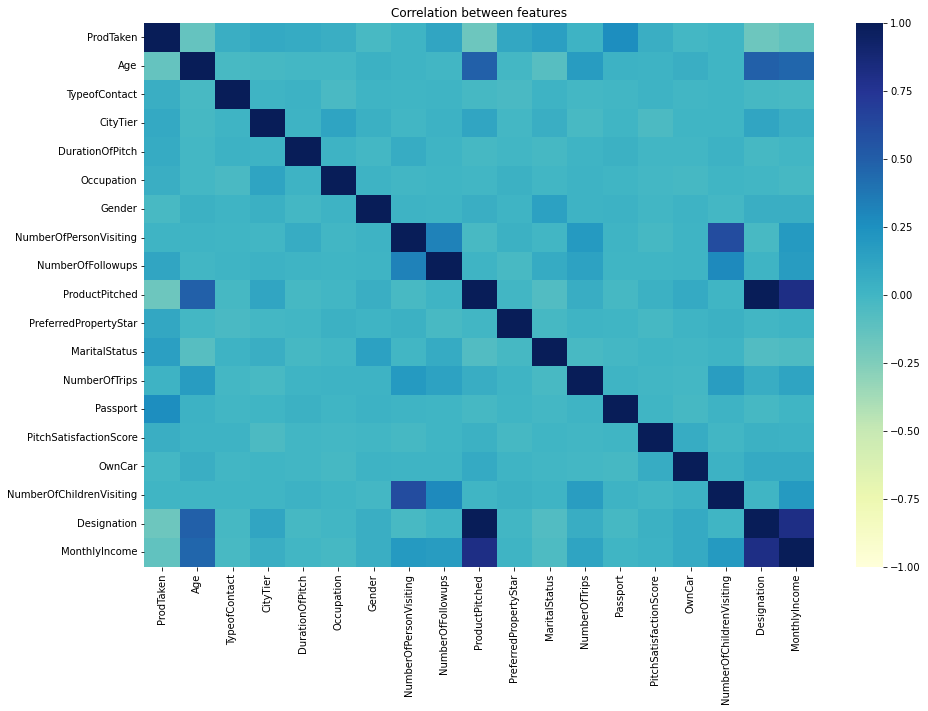

In [85]:
corr = df.corr() 
plt.figure(figsize=(15, 10))

# plotting the heat map
# corr: give the correlation matrix
# cmap: colour code used for plotting
# vmax: gives maximum range of values for the chart
# vmin: gives minimum range of values for the chart

sns.heatmap(corr, cmap='YlGnBu', vmax=1.0, vmin=-1.0)

# specify name of the plot
plt.title('Correlation between features')
print("\n After struturing  data THERE IS SIGNIFICANT DIRECT CORREALTION BETWEEN Prodct pitched with Designation and monthly income , and between age and monthly incomen,and no. of people visiting AND between Age with Designation , monthly income and product pitched , and between No. of people visiting with no. of children visiting and no. of persons visiting with foloow ups\n")
plt.show() 

After struturing  data THERE IS SIGNIFICANT DIRECT CORREALTION BETWEEN Prodct pitched with Designation and monthly income , and between age and monthly incomen,and no. of people visiting AND between Age with Designation , monthly income and product pitched , and between No. of people visiting with no. of children visiting and no. of persons visiting with foloow ups


  Designation has linear relationship wrt Product taken , and most of Lower age group has taken the Lower packages ,even the higher income group have purchased Lower packages not vice versa, No. of person  visiting remains same for 1st 3 lower packages later no. of person starts to reduce for higher package , but No. of Follow Ups has some  actual relationship for lower 2 products 


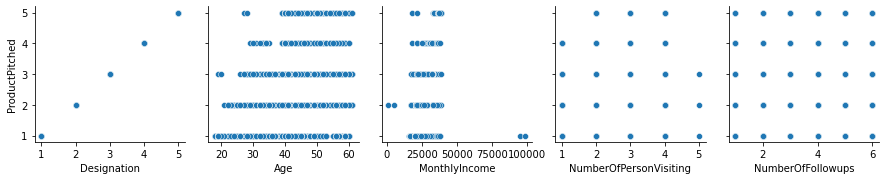

In [102]:
sns.pairplot(df, y_vars='ProductPitched', x_vars=['Designation','Age','MonthlyIncome','NumberOfPersonVisiting','NumberOfFollowups'])

print("\n  Designation has linear relationship wrt Product taken , and most of Lower age group has taken the Lower packages ,even the higher income group have purchased Lower packages not vice versa, No. of person  visiting remains same for 1st 3 lower packages later no. of person starts to reduce for higher package , but No. of Follow Ups has some  actual relationship for lower 2 products ")


 Products ppurchased has no relationship with designation, it looks like mosltly all desingnation purchased the  products and same designation have not purchased,Age too has no relationship with product purchased, NO. of follow ups seems to be having no effect , No. of Persons visiting is good if its between 2-4,and average income below 50000 has high chances of purchsing and high  income has low chances.



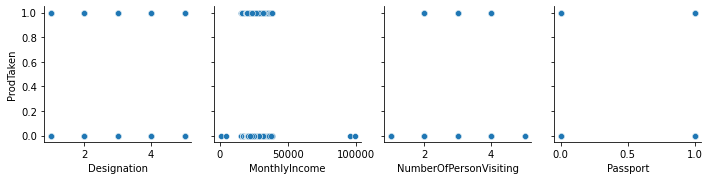

In [301]:
sns.pairplot(df, y_vars='ProdTaken', x_vars=['Designation','MonthlyIncome','NumberOfPersonVisiting','Passport'])

print("\n Products ppurchased has no relationship with designation, it looks like mosltly all desingnation purchased the  products and same designation have not purchased,Age too has no relationship with product purchased, NO. of follow ups seems to be having no effect , No. of Persons visiting is good if its between 2-4,and average income below 50000 has high chances of purchsing and high  income has low chances.\n")

In [381]:
df.drop(['PitchSatisfactionScore','ProductPitched','NumberOfFollowups','DurationOfPitch'], axis=1,inplace=True)
df

,ProdTaken,Age,TypeofContact,CityTier,Occupation,Gender,NumberOfPersonVisiting,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1.0,41.000000,1.0,3.0,1.0,2.0,3.0,3.0,3.0,1.0,1.0,1.0,0.0,2.0,20993.0
1,0.0,49.000000,2.0,1.0,1.0,1.0,3.0,4.0,2.0,2.0,0.0,1.0,2.0,2.0,20130.0
2,1.0,37.000000,1.0,1.0,5.0,1.0,3.0,3.0,3.0,7.0,1.0,0.0,0.0,1.0,17090.0
3,0.0,33.000000,2.0,1.0,1.0,2.0,2.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,17909.0
4,0.0,37.622265,1.0,1.0,3.0,1.0,2.0,4.0,2.0,1.0,0.0,1.0,0.0,1.0,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1.0,49.000000,1.0,3.0,3.0,1.0,3.0,4.0,4.0,2.0,1.0,1.0,1.0,2.0,26576.0
4884,1.0,28.000000,2.0,1.0,1.0,1.0,4.0,3.0,3.0,3.0,1.0,1.0,2.0,1.0,21212.0
4885,1.0,52.000000,1.0,3.0,1.0,2.0,4.0,4.0,1.0,7.0,0.0,1.0,3.0,3.0,31820.0
4886,1.0,19.000000,1.0,3.0,3.0,1.0,3.0,3.0,3.0,3.0,0.0,0.0,2.0,1.0,20289.0


In [382]:

from sklearn.model_selection import train_test_split

X = df.drop("ProdTaken", axis=1)
y = df['ProdTaken']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)


In [383]:


from sklearn.preprocessing import StandardScaler
 
object= StandardScaler()

# standardization 
scale = object.fit_transform(X) 
print(scale)
X_trainScale, X_testScale, y_trainScale, y_testScale = train_test_split(scale, y, test_size=.30, random_state=1)


[[ 0.36703572 -0.64188855  1.46842647 ... -1.39721512 -0.05259647
  -0.49904091]
 [ 1.24643673  1.55790286 -0.71401788 ...  0.95048184 -0.05259647
  -0.66299079]
 [-0.07266478 -0.64188855 -0.71401788 ... -1.39721512 -0.95321843
  -1.2405199 ]
 ...
 [ 1.57621211 -0.64188855  1.46842647 ...  2.12433033  0.84802549
   1.55783663]
 [-2.05131704 -0.64188855  1.46842647 ...  0.95048184 -0.95321843
  -0.6327845 ]
 [-0.1825899  -0.64188855 -0.71401788 ...  0.95048184 -0.95321843
   0.08000802]]


In [384]:
from sklearn.tree import DecisionTreeClassifier

dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

1.0
0.8697738176833447


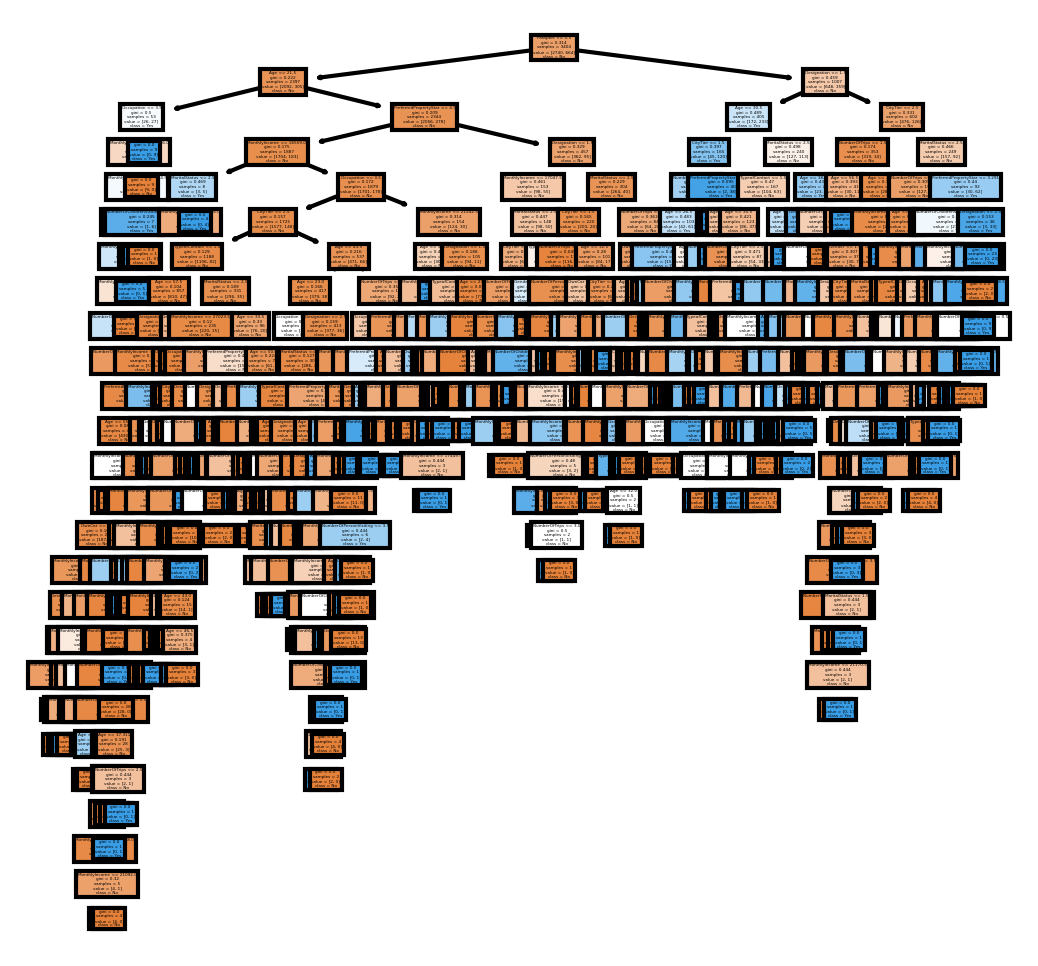

In [391]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fn = list(X_train)
cn = ['No', 'Yes']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(dTree, feature_names = fn, class_names=cn, filled = True)

fig.savefig('tree.png')

In [340]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.8296122209165687
0.8450993831391364


In [282]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = X_train.columns))

                               Imp
Age                       0.140544
TypeofContact             0.000000
CityTier                  0.106727
Occupation                0.025558
Gender                    0.000000
NumberOfPersonVisiting    0.000000
PreferredPropertyStar     0.044324
MaritalStatus             0.000000
NumberOfTrips             0.000000
Passport                  0.365117
OwnCar                    0.000000
NumberOfChildrenVisiting  0.000000
Designation               0.317730
MonthlyIncome             0.000000


0.8450993831391364
[0. 0. 0. ... 0. 0. 0.]


<AxesSubplot:>

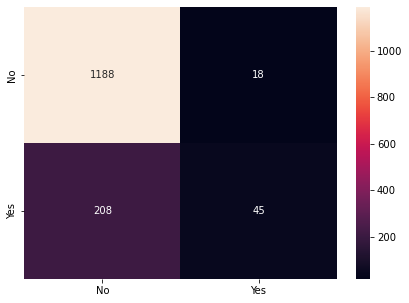

In [284]:
###predicting columns having useful features


from sklearn.metrics import confusion_matrix
import seaborn as sns

print(dTreeR.score(X_test , y_test))
y_predict = dTreeR.predict(X_test)
print(y_predict)
cm = confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [285]:
#top 8 columns having best feature importances

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0, max_depth=6)

regressor.fit(X_train , y_train)
feature_importances = regressor.feature_importances_


feature_names = X_train.columns
print(feature_names)

k = 8

print(feature_importances)
top_k_idx = (feature_importances.argsort()[-k:][::-1])

print(feature_names[top_k_idx], feature_importances)

Index(['Age', 'TypeofContact', 'CityTier', 'Occupation', 'Gender',
       'NumberOfPersonVisiting', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'OwnCar', 'NumberOfChildrenVisiting',
       'Designation', 'MonthlyIncome'],
      dtype='object')
[0.17716382 0.01443304 0.0866492  0.02269746 0.00374951 0.
 0.04891631 0.11899259 0.04845631 0.19724466 0.         0.00940978
 0.20196068 0.07032664]
Index(['Designation', 'Passport', 'Age', 'MaritalStatus', 'CityTier',
       'MonthlyIncome', 'PreferredPropertyStar', 'NumberOfTrips'],
      dtype='object') [0.17716382 0.01443304 0.0866492  0.02269746 0.00374951 0.
 0.04891631 0.11899259 0.04845631 0.19724466 0.         0.00940978
 0.20196068 0.07032664]



##FROM NOW COMPARISION OF DIFFERT MODELS AND THEIR PREDICTION , TO IDENTIFY WHICH PERFORMS THE BEST



0.9136394790952708
float64


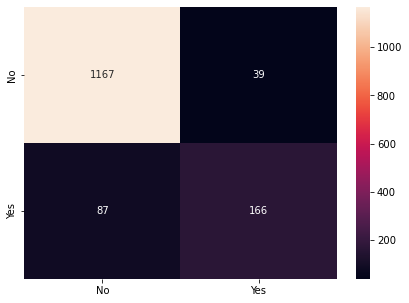

In [345]:
from sklearn.ensemble import BaggingClassifier
from sklearn import metrics
bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)

y_predictbag_class = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predictbag_class,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

print(y_predictbag_class.dtype)

0.9136394790952708


<AxesSubplot:>

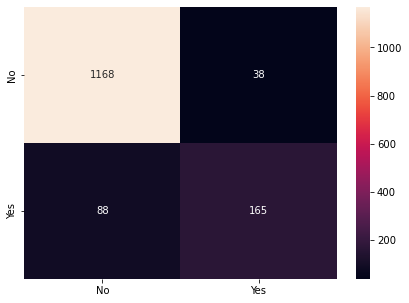

In [342]:
##CHECKING RESULT FOR STANDARD SCALER

#X_trainScale, X_testScale, y_trainScale, y_testScale = train_test_split(scale, y, test_size=.30, random_state=1)
from sklearn.ensemble import BaggingClassifier
from sklearn import metrics
bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_trainScale, y_trainScale)

y_predictbag_class = bgcl.predict(X_testScale)

print(bgcl.score(X_testScale , y_testScale))

cm=metrics.confusion_matrix(y_testScale, y_predictbag_class,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


### SAME RESULTS EVEN AFTER USING STANDARD SCALER

0.9129540781357094


<AxesSubplot:>

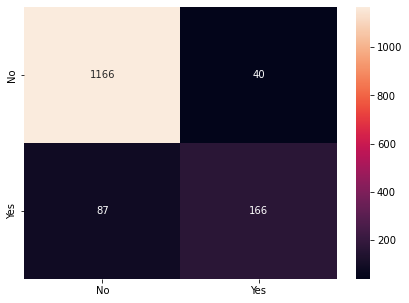

In [343]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train, y_train)

y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')



0.8498971898560658


<AxesSubplot:>

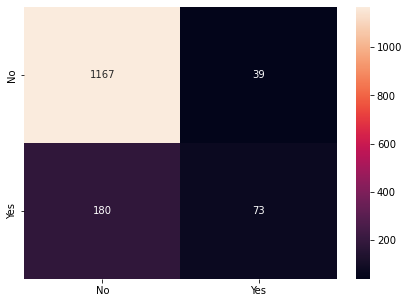

In [291]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
abcl = abcl.fit(X_train, y_train)

y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')



0.8649760109664153


<AxesSubplot:>

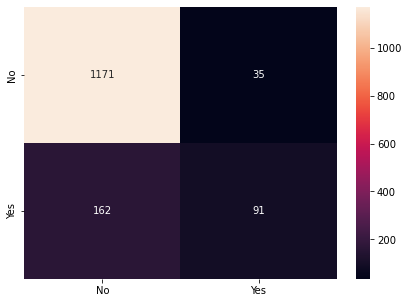

In [292]:


from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)

y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')



In [293]:
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns. Other option 
# could be gini index.  Restricting the depth of the tree to 5 (no particular reason for selecting this)

model_entropy=DecisionTreeClassifier(criterion='entropy')
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [294]:
model_entropy.score(X_train, y_train)


1.0

In [295]:
model_entropy.score(X_test, y_test)

0.8793694311172036



Regularize/prune the decision tree by limiting the max. depth of trees and print the accuracy.



In [296]:
clf_pruned = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [306]:
preds_pruned = clf_pruned.predict(X_test)
preds_pruned_train = clf_pruned.predict(X_train)
print(accuracy_score(y_test,preds_pruned))
print(accuracy_score(y_train,preds_pruned_train))
acc_DT = accuracy_score(y_test, preds_pruned)
print(acc_DT)

0.8430431802604523
0.8269682726204466
0.8430431802604523


In [298]:
from sklearn.tree import export_graphviz
from IPython.display import Image  

xvar = df.drop('ProdTaken', axis=1)
feature_cols = xvar.columns
feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)


feat_imp_dict = dict(zip(feature_cols, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)


,0
Passport,0.380112
Designation,0.332234
CityTier,0.150649
MaritalStatus,0.090560
Age,0.046445
TypeofContact,0.000000
Occupation,0.000000
Gender,0.000000
NumberOfPersonVisiting,0.000000
PreferredPropertyStar,0.000000


In [302]:
#Store the accuracy results for each model in a dataframe for final comparison
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier


resultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT})
resultsDf = resultsDf[['Method', 'accuracy']]

rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, y_train)

pred_RF = rfcl.predict(X_test)
acc_RF = accuracy_score(y_test, pred_RF)

tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [acc_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
abcl = AdaBoostClassifier( n_estimators= 100, learning_rate=0.1, random_state=22)
abcl = abcl.fit(X_train, y_train)

pred_AB =abcl.predict(X_test)
acc_AB = accuracy_score(y_test, pred_AB)

tempResultsDf = pd.DataFrame({'Method':['Adaboost'], 'accuracy': [acc_AB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
bgcl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(X_train, y_train)

pred_BG =bgcl.predict(X_test)
acc_BG = accuracy_score(y_test, pred_BG)

tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [acc_BG]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22)
gbcl = gbcl.fit(X_train, y_train)

pred_GB =gbcl.predict(X_test)
acc_GB = accuracy_score(y_test, pred_GB)

tempResultsDf = pd.DataFrame({'Method':['Gradient Boost'], 'accuracy': [acc_GB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf



,Method,accuracy
0,Decision Tree,0.843043
0,Random Forest,0.901302
0,Adaboost,0.846470
0,Bagging,0.907471
0,Gradient Boost,0.865661


In [196]:
!pip install xgboost
!pip install catboost
!pip install lightgbm

     -------------------------------------- 70.9/70.9 MB 410.3 kB/s eta 0:00:00
^C


In [303]:
from xgboost import XGBRegressor
#from catboost import CatBoostRegressor
#from lightgbm import LGBMRegressor

# methods and classes for evaluation
from sklearn import metrics
from math import sqrt
from sklearn.model_selection import cross_validate
import time





In [304]:

from xgboost import XGBClassifier
modelxg = XGBClassifier()
modelxg.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [305]:
y_pred = modelxg.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 90.47%


In [346]:

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint as sp_randint

#Assigning my Train and Test spilt to my RandomForestClassifier object

# build a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50)

#Specifying the list of parameters and distributions

param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

#Defining the sample, distributions and cross-validation

samples = 8  # number of random samples 
randomCV = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=samples,cv=3)

#All parameters are set and, let’s do the fit model

randomCV.fit(X, y)
print(randomCV.best_params_)

print(randomCV.cv_results_['mean_test_score'])

print(randomCV.score(X_test,y_test))
y_predictrandomCV = randomCV.predict(X_test)
print(y_predictrandomCV)


{'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 4, 'min_samples_leaf': 1, 'min_samples_split': 6}
[0.81246144 0.91157722 0.84824183 0.81205017 0.83652067 0.83055727
 0.83117417 0.81719103]
1.0
[0. 0. 0. ... 0. 0. 0.]


In [320]:
df['ProdTaken']

0       1.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
4883    1.0
4884    1.0
4885    1.0
4886    1.0
4887    1.0
Name: ProdTaken, Length: 4863, dtype: float64

In [ ]:

##IT APPEARS THAT BAGGING IS GIVING MAXIMUM ACCURACY, 

#ADDING THE PREDICTION COLUMN TO MAIN DATA


0.9136394790952708
[0 0 0 ... 0 0 0]


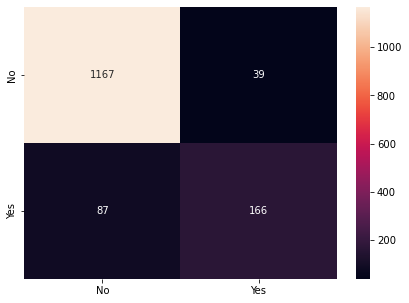

In [386]:
from sklearn.ensemble import BaggingClassifier
from sklearn import metrics
bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)

y_predictbag_class = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predictbag_class,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

print(y_predictbag_class.astype(int))

pred_class  = np.where(y_predictbag_class ==1, "Yes", "No") #for binary(Yes/No) category
predictions = pd.DataFrame(pred_class, columns=['Prediction'])
my_new_df = pd.concat([df, predictions], axis =1)

In [387]:
my_new_df.head(20)
my_new_df.drop(['CityTier','TypeofContact','Occupation','NumberOfPersonVisiting','PreferredPropertyStar','MaritalStatus','NumberOfTrips','Passport','OwnCar','NumberOfChildrenVisiting','MonthlyIncome'], axis=1,inplace=True)


In [390]:
# Convert the dictionary into DataFrame
dfC = pd.DataFrame(my_new_df)
  
# Using 'Address' as the column name
# and equating it to the list
dfC['CUSTOMER_IDS'] = df_temp3['CustomerID']
dfC.head(20)

,ProdTaken,Age,Gender,Designation,Prediction,CUSTOMER_IDS
0,1.0,41.000000,2.0,2.0,No,200000
1,0.0,49.000000,1.0,2.0,No,200001
2,1.0,37.000000,1.0,1.0,No,200002
3,0.0,33.000000,2.0,1.0,No,200003
4,0.0,37.622265,1.0,1.0,Yes,200004
5,0.0,32.000000,1.0,1.0,Yes,200005
6,0.0,59.000000,2.0,1.0,No,200006
7,0.0,30.000000,1.0,1.0,No,200007
8,0.0,38.000000,1.0,3.0,No,200008
9,0.0,36.000000,1.0,2.0,No,200009


In [ ]:


BELOW IS ANALYSIS OF WHO BUYS THE NEW PRODUCT WITH RESPECT TO EARLIER CONSUMERS WHO PURCHASED THE OLD PRODUCT

